# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [140]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [141]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].nunique()
mouse_count

249

In [142]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_mouse_df[combined_mouse_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mouse["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [143]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_mouse_df.loc[combined_mouse_df["Mouse ID"]=="g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [144]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = combined_mouse_df.loc[combined_mouse_df["Mouse ID"]!="g989"]
cleaned_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [145]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = cleaned_mouse_df["Mouse ID"].nunique()
new_mouse_count

248

## Summary Statistics

In [146]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = cleaned_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(numeric_only=True)
tumor_volume_median = cleaned_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(numeric_only=True)
tumor_volume_variance = cleaned_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(numeric_only=True)
tumor_volume_standard_deviation = cleaned_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(numeric_only=True)
tumor_volume_sem = cleaned_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(numeric_only=True)

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":tumor_volume_mean,
                           "Median Tumor Volume":tumor_volume_median,
                           "Tumor Volume Variance":tumor_volume_variance,
                           "Tumor Volume Std. Dev.":tumor_volume_standard_deviation,
                           "Tumor Volume Std. Err.":tumor_volume_sem
                          })

# Display the dataframe
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [147]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = cleaned_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_df 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

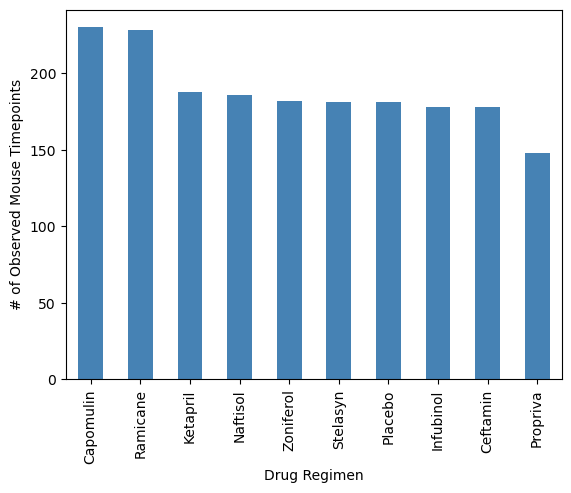

In [148]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count = cleaned_mouse_df["Drug Regimen"].value_counts()
plot_pandas_bar = mouse_count.plot.bar(color="steelblue")

# set xlabel, ylabel 
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

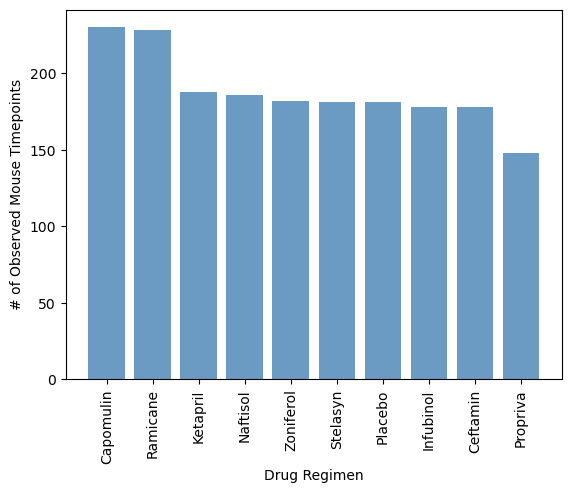

In [149]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_count.index.values
y_axis = mouse_count.values

plt.bar(x_axis, y_axis, color="steelblue", alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

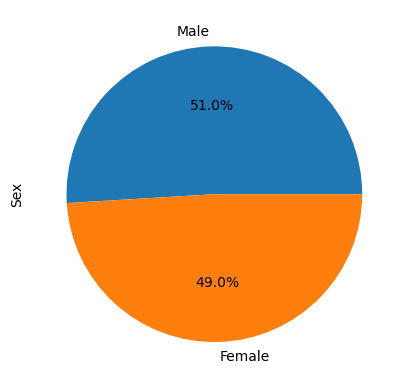

In [150]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = cleaned_mouse_df["Sex"].value_counts()
plot_pandas_pie = gender_data.plot.pie(autopct= "%1.1f%%")
plt.ylabel("Sex")
plt.show()

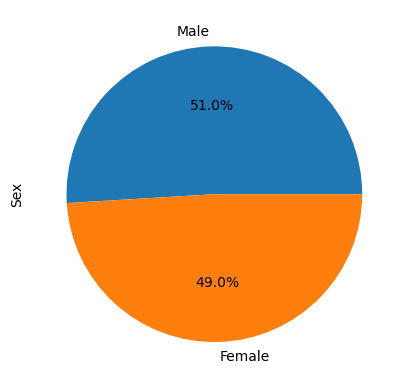

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.7999197, 50.200803]
plot_pyplot_pie = gender_data.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [152]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = pd.DataFrame(cleaned_mouse_df.groupby(["Mouse ID"])["Timepoint"].max(numeric_only=True))
greatest_timepoint = greatest_timepoint.reset_index()
greatest_timepoint = greatest_timepoint.rename(columns={"Timepoint":"Last Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(greatest_tp, combined_mouse_df, on="Mouse ID", how="left")
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df["Timepoint"] == final_tumor_volume_df["Last Timepoint"]]

final_tumor_volume_df.head()

,Mouse ID,Last Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,45,70.717621,4,Placebo,Female,17,29
39,a275,45,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,30,63.440686,1,Stelasyn,Female,16,29


In [153]:
# Creating a DataFrame with just the drugs in question 
mouse_treatments = final_tumor_volume_df[(final_tumor_volume_df["Drug Regimen"] == 'Capomulin') | (final_tumor_volume_df["Drug Regimen"] == 'Ramicane') | (final_tumor_volume_df["Drug Regimen"] == 'Infubinol') | (final_tumor_volume_df["Drug Regimen"] == 'Ceftamin')]
mouse_treatments.head()

,Mouse ID,Last Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,45,65.525743,1,Infubinol,Female,21,25
39,a275,45,45,62.999356,3,Ceftamin,Female,20,28
66,a411,45,45,38.407618,1,Ramicane,Male,3,22
76,a444,45,45,43.047543,0,Ramicane,Female,10,25


In [158]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

cap = mouse_treatments.loc[mouse_treatments["Drug Regimen"]=="Capomulin"]
ram = mouse_treatments.loc[mouse_treatments["Drug Regimen"]=="Ramicane"]
inf = mouse_treatments.loc[mouse_treatments["Drug Regimen"]=="Infubinol"]
cef = mouse_treatments.loc[mouse_treatments["Drug Regimen"]=="Ceftamin"]

# Drop the columns not relevant to the Tumor Volume and Drug Regimen 
cap = cap.drop(columns=["Timepoint", "Metastatic Sites", "Sex", "Age_months", "Weight (g)", "Last Timepoint", "Mouse ID"])
ram = ram.drop(columns=["Timepoint", "Metastatic Sites", "Sex", "Age_months", "Weight (g)", "Last Timepoint", "Mouse ID"])
inf = inf.drop(columns=["Timepoint", "Metastatic Sites", "Sex", "Age_months", "Weight (g)", "Last Timepoint", "Mouse ID"])
cef = cef.drop(columns=["Timepoint", "Metastatic Sites", "Sex", "Age_months", "Weight (g)", "Last Timepoint", "Mouse ID"])

# Get the tumor volume data for each drug 
cap_vol = cap["Tumor Volume (mm3)"]
ram_vol = ram["Tumor Volume (mm3)"]
inf_vol = inf["Tumor Volume (mm3)"]
cef_vol = cef["Tumor Volume (mm3)"]

# Creat empty lists to append outliers to for each drug regimen 
cap_list = []
ram_list = []
inf_list = []
cef_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # add subset 
    # Calculate the IQR and quantitatively
    
    if drug == "Capomulin":
        quartiles = cap['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers = cap.loc[(cap["Tumor Volume (mm3)"]<lower_bound) | (cap["Tumor Volume (mm3)"]>upper_bound)]
        cap_list.append(outliers)
    elif drug == "Ramicane":
        quartiles = ram['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers = ram.loc[(ram["Tumor Volume (mm3)"]<lower_bound) | (ram["Tumor Volume (mm3)"]>upper_bound)]
        ram_list.append(outliers)
    elif drug == "Infubinol":
        quartiles = inf['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers = inf.loc[(inf["Tumor Volume (mm3)"]<lower_bound) | (inf["Tumor Volume (mm3)"]>upper_bound)]
        inf_list.append(outliers)
    else:
        quartiles = cef['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers = cef.loc[(cef["Tumor Volume (mm3)"]<lower_bound) | (cef["Tumor Volume (mm3)"]>upper_bound)]
        cef_list.append(outliers)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_volume_df['Tumor Volume (mm3)'].loc[(final_tumor_volume_df['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_volume_df['Tumor Volume (mm3)'] > upper_bound)]

for drug, outliers in zip(treatments, [cap_list, ram_list, inf_list, cef_list]):
    print(f"{drug}'s potential outliers:")
    for idx, outlier in enumerate(outliers):
        if not outlier.empty:
            print(f"Outlier {idx + 1}:")
            print(outlier)
        else:
            print("No outliers found.")
    print("\n")


Capomulin's potential outliers:
No outliers found.


Ramicane's potential outliers:
No outliers found.


Infubinol's potential outliers:
Outlier 1:
     Tumor Volume (mm3) Drug Regimen
275           36.321346    Infubinol


Ceftamin's potential outliers:
No outliers found.




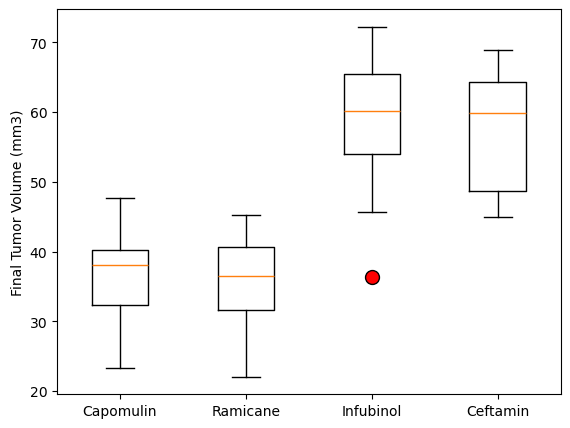

In [159]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data_list = [cap_vol, ram_vol, inf_vol, cef_vol]
plt.figure(figsize=(6.5,5))
plt.boxplot(tumor_vol_data_list, flierprops={'markerfacecolor':'r','markersize': 10})

plt.ylabel("Final Tumor Volume (mm3)")
tick_locations = xticks = [1, 2, 3, 4]
plt.xticks(tick_locations,treatments)
plt.show()

## Line and Scatter Plots

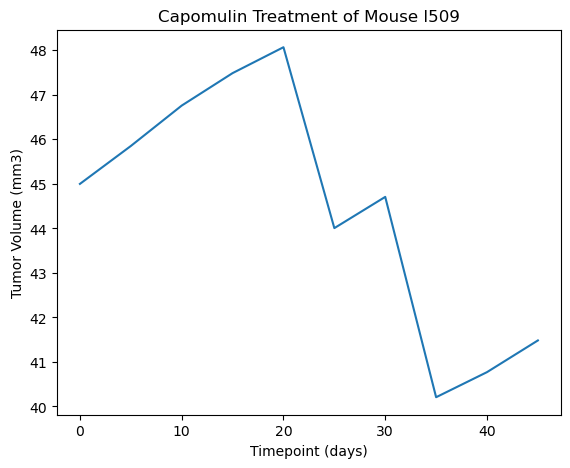

In [160]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = cleaned_mouse_df[cleaned_mouse_df["Drug Regimen"] =="Capomulin"]
capomulin_mouse = capomulin[capomulin["Mouse ID"]=="l509"]
volume = capomulin_mouse["Tumor Volume (mm3)"]
x_axis = capomulin_mouse["Timepoint"]
plt.figure(figsize=(6.5,5))
plt.plot(x_axis, volume)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

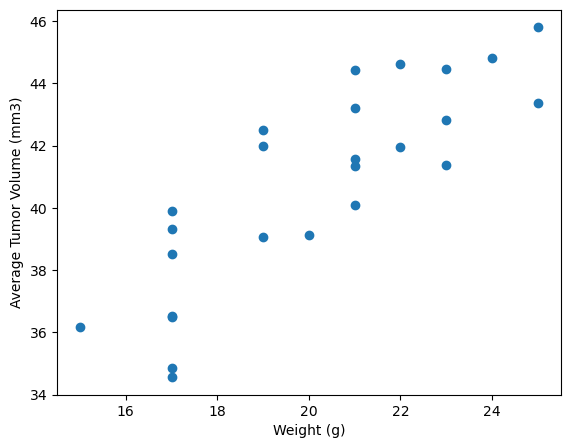

In [161]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg = cleaned_mouse_df[cleaned_mouse_df["Drug Regimen"] =="Capomulin"]
avg_weight = capomulin_avg.groupby(["Mouse ID"]).mean(numeric_only=True)["Tumor Volume (mm3)"]
x_axis_avg = capomulin_avg.groupby(["Mouse ID"]).mean(numeric_only=True)["Weight (g)"]
plt.figure(figsize=(6.5,5))
plt.scatter(x_axis_avg, avg_weight)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


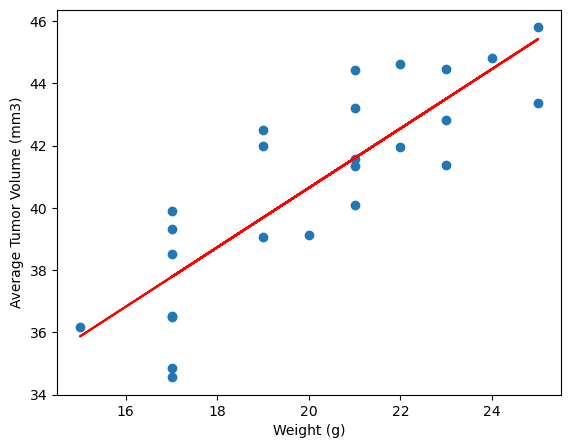

In [162]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_avg_reg = cleaned_mouse_df[cleaned_mouse_df["Drug Regimen"] =="Capomulin"]
avg_weight_reg = capomulin_avg_reg.groupby(["Mouse ID"]).mean(numeric_only=True)["Tumor Volume (mm3)"]
x_axis_avg_reg = capomulin_avg_reg.groupby(["Mouse ID"]).mean(numeric_only=True)["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_avg_reg, avg_weight_reg)
regress_values = x_axis_avg_reg * slope + intercept
plt.figure(figsize=(6.5,5))
plt.scatter(x_axis_avg_reg, avg_weight_reg)
plt.plot(x_axis_avg_reg, regress_values, "r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {rvalue:.2f}")
plt.show()